<h1><font color='blue'> 9E and 9F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 9E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [5]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=24)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3200, 5) (3200,)
(800, 5) (800,)
(1000, 5) (1000,)


In [12]:
# you can write your code here
gamma = 0.001
clf = SVC(gamma=gamma, C=100)
clf.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
def K(xq):
    val = 0
    for alpha,xi in zip(clf.dual_coef_[0],clf.support_vectors_): #the dual_coef_[i] contains label[i]*alpha[i]
        val += alpha*np.exp(-gamma*np.linalg.norm(xi-xq)**2) 
    return val+clf.intercept_.item()

In [14]:
def dec_fun(X_val):
    fcv = []
    for xq in X_val:
        fcv.append(K(xq))
    return(np.array(fcv))

In [15]:
dec_fun(X_val)[:5]

array([-2.69065026, -4.01123357, -2.48966713,  1.35046624, -2.59528514])

In [16]:
clf.decision_function(X_val)[:5]

array([-2.69065026, -4.01123357, -2.48966713,  1.35046624, -2.59528514])

###### Hence both the values matched

<h2><font color='Geen'> 9F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

# TASK- F

In [17]:
fcv = dec_fun(X_val)
y_val_cpy = y_val.astype('float')
unique,counts = np.unique(y_val_cpy,return_counts=True)
print(unique,counts)
y_val_cpy[y_val_cpy==unique[0]]=1.0/(counts[0]+2)
y_val_cpy[y_val_cpy==unique[1]]=(counts[1]+1.0)/(counts[1]+2)

[0. 1.] [550 250]


In [18]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w.T)+b)))

In [19]:
def update_weights(X,y,w,b,lamda,alpha,N):
    w_new = (1-alpha*lamda/N)*w + alpha*X*(y-sigmoid(w,X.T,b))
    b_new = b + alpha*(y-sigmoid(w,X.T,b))
    return w_new,b_new

In [20]:
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [21]:
def compute_log_loss(A,n):# your code
    loss=0
    for Y in A:
        loss += Y[0]*math.log(Y[1])+(1-Y[0])*math.log(1-Y[1]) 
    loss = -loss/n
    return loss

In [22]:
w = np.zeros((1,))
b = 0
lamda  = 0.0001
alpha = 0.0001
N = len(fcv)
w.shape

(1,)

In [28]:
import math
lossHistoryTrain = []
lossHistoryTest = []
epochs = range(1,30)
for epoch in epochs:
    # initialize the total loss for the epoch
    epochLossTrain = []
    epochLossTest = []
    # loop over our data in batches
    for (batchX, batchY) in next_batch(fcv, y_val_cpy, 1):
        preds = sigmoid(w,batchX,b)
        loss = -(batchY*math.log(preds)+(1-batchY)*math.log(1-preds))
        epochLossTrain.append(loss)
        w, b = update_weights(batchX,batchY,w,b,lamda,alpha,N)
        
    avgLossTrain = np.average(epochLossTrain)
    lossHistoryTrain.append(avgLossTrain)
    print("iteration:{}".format(epoch))
    print("Training Loss:{}".format(avgLossTrain))
    y_pred = [sigmoid(w,x.reshape(-1,1),b) for x in dec_fun(X_test)]
    avgLossTest = compute_log_loss(zip(y_test,y_pred),len(y_test))
    lossHistoryTest.append(avgLossTest)
    print("Test Loss:{}".format(avgLossTest))
    print('='*75)
print('Final Weights:')
print(w)
print('Final Intercept:',b)

iteration:1
Training Loss:0.23493825426267267
Test Loss:0.2425100230708235
iteration:2
Training Loss:0.23249327107731976
Test Loss:0.24023840043935585
iteration:3
Training Loss:0.2301828022467933
Test Loss:0.2380944397637579
iteration:4
Training Loss:0.2279960983825657
Test Loss:0.2360680256576708
iteration:5
Training Loss:0.22592352856194545
Test Loss:0.23415008094321274
iteration:6
Training Loss:0.2239564385208662
Test Loss:0.23233243693276473
iteration:7
Training Loss:0.2220870298487404
Test Loss:0.23060772264397336
iteration:8
Training Loss:0.22030825665508055
Test Loss:0.22896926981050644
iteration:9
Training Loss:0.21861373683729948
Test Loss:0.2274110311293033
iteration:10
Training Loss:0.21699767560385105
Test Loss:0.22592750964662947
iteration:11
Training Loss:0.2154547993265748
Test Loss:0.22451369755555076
iteration:12
Training Loss:0.2139802981334635
Test Loss:0.22316502297609517
iteration:13
Training Loss:0.21256977592563206
Test Loss:0.22187730353132648
iteration:14
Train

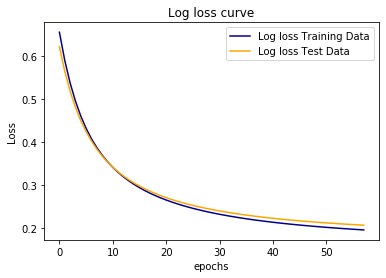

In [31]:
import matplotlib.pyplot as plt
plt.plot(np.array(lossHistoryTrain), color='darkblue', label='Log loss Training Data')
plt.plot(np.array(lossHistoryTest), color='orange', label='Log loss Test Data')

plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('Log loss curve')
plt.legend()
plt.show()

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
